In [13]:
%run ../collect.py --root_dir=/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/klno/co2 --filename=out.log --output=../data/co2-klno.json
%run ../collect.py --root_dir=/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/k-sos-mp2/co2 --filename=out.log --output=../data/co2-k-sos-mp2.json
%run ../collect.py --root_dir=/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/ref-kpts/co2 --filename=out.log --output=../data/co2-ref-kpts.json

In [14]:
import os, sys, json
import pandas as pd

def load_data(f):
    # Load the JSON data as a dictionary first
    with open(f, 'r') as file:
        data = json.load(file)
    
    # Convert the nested dictionary to a list of records
    records = []
    for path, params in data.items():
        # Add the path as a field and merge with params
        record = {'path': path, **params}
        records.append(record)
    
    # Create DataFrame from records
    return pd.DataFrame(records)

method = 'fftisdf-140-14'

d = load_data('../data/co2-klno.json')
data_co2_klno = d[d['method'] == method]

d = load_data('../data/co2-k-sos-mp2.json')
data_co2_k_sos_mp2 = d[d['method'] == method]

print(data_co2_klno)

                                                  path          method  \
0    /Users/yangjunjie/work/fftisdf-for-dmet/fftisd...  fftisdf-140-14   
1    /Users/yangjunjie/work/fftisdf-for-dmet/fftisd...  fftisdf-140-14   
2    /Users/yangjunjie/work/fftisdf-for-dmet/fftisd...  fftisdf-140-14   
3    /Users/yangjunjie/work/fftisdf-for-dmet/fftisd...  fftisdf-140-14   
4    /Users/yangjunjie/work/fftisdf-for-dmet/fftisd...  fftisdf-140-14   
..                                                 ...             ...   
136  /Users/yangjunjie/work/fftisdf-for-dmet/fftisd...  fftisdf-140-14   
137  /Users/yangjunjie/work/fftisdf-for-dmet/fftisd...  fftisdf-140-14   
138  /Users/yangjunjie/work/fftisdf-for-dmet/fftisd...  fftisdf-140-14   
139  /Users/yangjunjie/work/fftisdf-for-dmet/fftisd...  fftisdf-140-14   
140  /Users/yangjunjie/work/fftisdf-for-dmet/fftisd...  fftisdf-140-14   

       basis  natm   nkpt    nao  time_build_df    naux  time_krhf  \
0    cc-pvdz  12.0   48.0  156.0         

nk =    2, ene_krhf = -148.14659542, ene_sos_mp2 = -149.90621388, ene_mp2 = -149.44778683, ene_ccsd = -149.49793201, ene_ccsd_t = -149.47623142
nk =    4, ene_krhf = -148.10062138, ene_sos_mp2 = -149.87010507, ene_mp2 = -149.41866385, ene_ccsd = -149.45085142, ene_ccsd_t = -149.42723163
nk =    8, ene_krhf = -148.07783580, ene_sos_mp2 = -149.85290927, ene_mp2 = -149.40602762, ene_ccsd = -149.42902588, ene_ccsd_t = -149.40248885
nk =   12, ene_krhf = -148.07049376, ene_sos_mp2 = -149.84713706, ene_mp2 = -149.40016615, ene_ccsd = -149.42351076, ene_ccsd_t = -149.39731883
nk =   18, ene_krhf = -148.06442375, ene_sos_mp2 = -149.84207126, ene_mp2 = -149.39433175, ene_ccsd = -149.41856995, ene_ccsd_t = -149.39283612
nk =   27, ene_krhf = -148.06113188, ene_sos_mp2 = -149.83949642, ene_mp2 = -149.39178338, ene_ccsd = -149.41617598, ene_ccsd_t = -149.39061528
nk =   36, ene_krhf = -148.05941384, ene_sos_mp2 = -149.83811866, ene_mp2 = -149.39040638, ene_ccsd = -149.41500582, ene_ccsd_t = -149.3

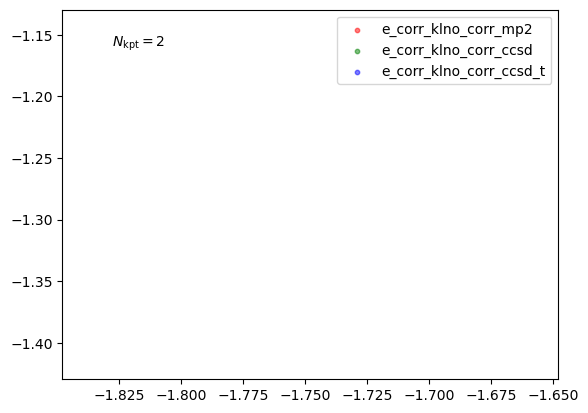

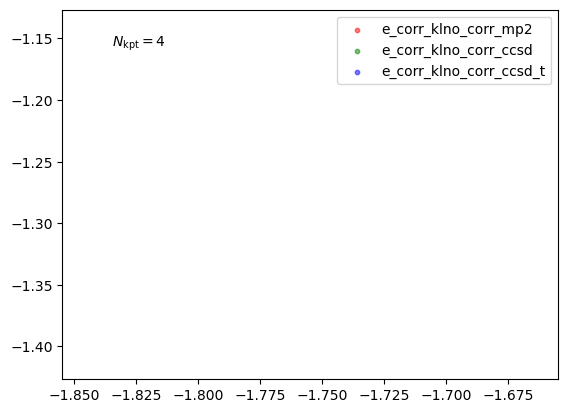

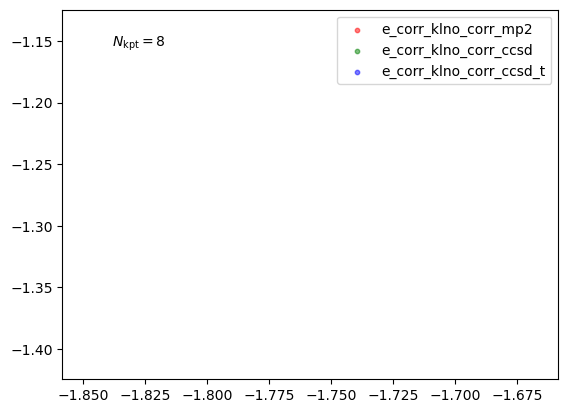

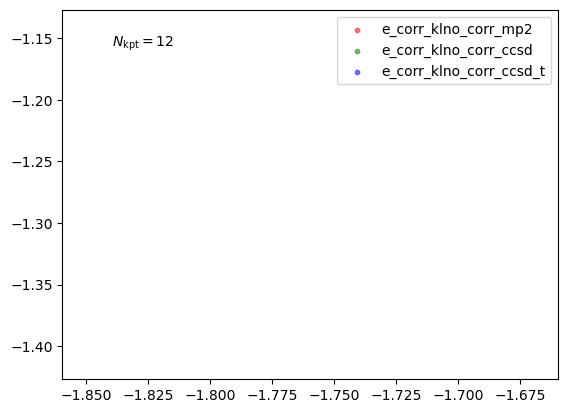

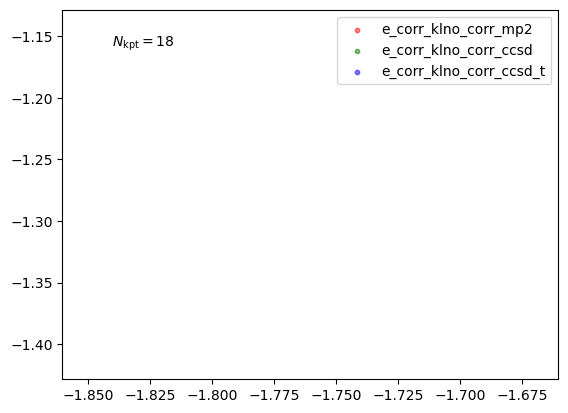

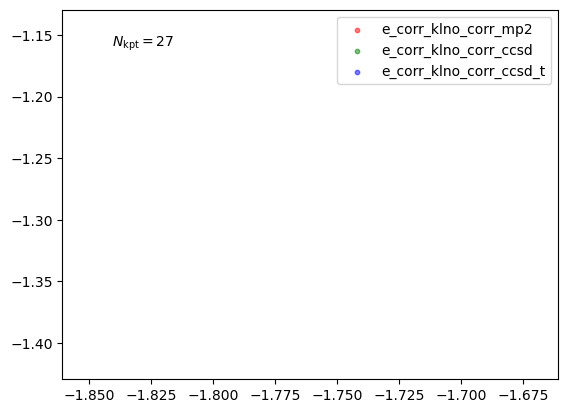

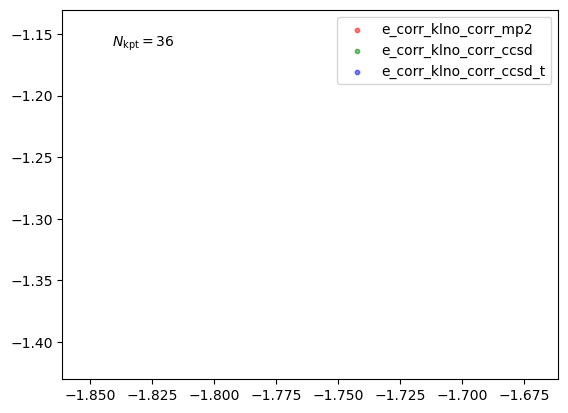

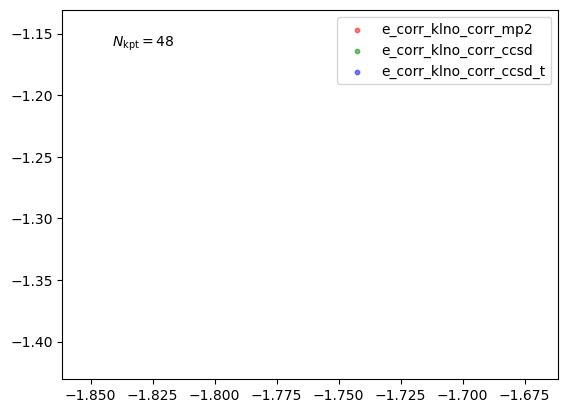

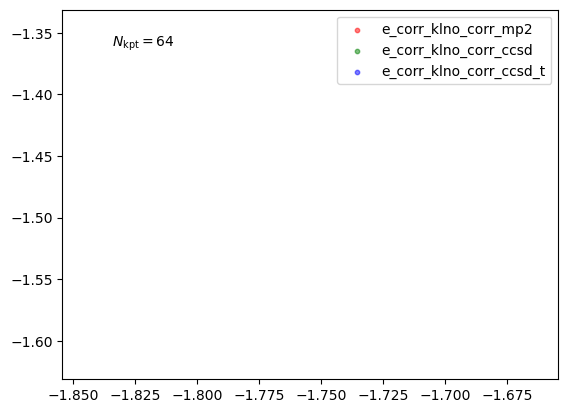

In [ ]:
# plot all the results
nkpt = data_co2_klno['nkpt'].unique()
nkpt.sort()
nkpt = nkpt[1:-2]

for nk in nkpt:
    colors = ['r', 'g', 'b']
    label = ['e_corr_klno_corr_os', 'e_corr_klno_corr_mp2', 'e_corr_klno_corr_ccsd', 'e_corr_klno_corr_ccsd_t']
    cols = data_co2_klno[data_co2_klno['nkpt'] == nk][label]
    x0 = data_co2_k_sos_mp2[data_co2_k_sos_mp2['nkpt'] == nk]['ene_os_lt30'].item()
    x0 = x0 * 1.3

    # print(f"nkpt: {nk}")
    cols = cols[cols != 0]
    # delete NaN
    cols = cols.dropna()
    # sort by e_corr_klno_corr_os
    cols = cols.sort_values('e_corr_klno_corr_os')


    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    ax.text(0.1, 0.9, r"$N_{\mathrm{{kpt}}} = {%d}$" % nk, transform=ax.transAxes)

    ene_krhf = data_co2_klno[data_co2_klno['nkpt'] == nk]['ene_krhf'].values[0]
    out = "nk = %4d, ene_krhf = %12.8f, ene_sos_mp2 = %12.8f" % (nk, ene_krhf, ene_krhf + x0 * 1.3)
    for il, l in enumerate(label[1:]):
        x = cols['e_corr_klno_corr_os']
        y = cols[l]
        # delete repeated values
        x = x.drop_duplicates()
        y = y.drop_duplicates()
        x = x * 1.3

        import numpy, scipy
        from scipy.optimize import curve_fit

        r = numpy.polyfit(x[:3], y[:3], 1)
        p = numpy.poly1d(r)
        y0 = p(x0)

        ax.scatter(x, y, c=colors[il], label=l, s=10, alpha=0.5)
        xmin = min(x.min(), x0)
        xmax = max(x.max(), x0)
        x = numpy.linspace(xmin - 0.1, xmax + 0.1, 100)
        y = p(x)
        ax.plot(x, y, color=colors[il], linestyle='--', marker='')
        ax.scatter([x0], [y0], c=colors[il], marker='x')
        ax.legend()

        

        ax.set_xlim(xmin - 0.1, xmin + 0.1)
        ax.set_ylim(y0 - 0.1, y0 + 0.2)

        name = "ene_" + l.split('e_corr_klno_corr_')[-1]
        out += f", {name} = {y0 + ene_krhf:12.8f}"

    print(out)

